# NK Data

For adding new nk data to my master directory

initial stuff

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.interpolate import interp1d

define plot style

In [2]:
%config InlineBackend.figure_format = 'retina' #to make inline images higher res
plt.style.use(['presplot_small']) #this is a plot format that I have in my style folder on my computer

load nk data - as a dictionary with the different materials as items, arrays are lambda (microns), n, k

In [56]:
nkdata_raw = np.load('nkdata_raw.npy',allow_pickle='TRUE').item()
print(nkdata_raw.keys())

dict_keys(['Ag_raw', 'Al_raw', 'Au_raw', 'ITO_raw', 'In_raw', 'MoS_2_raw', 'MoSe_2_raw', 'PDMS_raw', 'Pd_raw', 'Pt_raw', 'SiO_2_raw', 'Si_raw', 'WS_2_raw', 'WSe_2_raw', 'monoWS_2_raw', 'TiO_2_raw', 'SnO_2_raw', 'PEDOT_raw', 'TCTA_raw', 'MoO_3_raw', 'NiO_x_raw', 'Spiro_raw', 'WO_3_raw', 'ZnO_raw'])


edit nk data

In [52]:
matname='ZnO'
filename=matname+'-PVLH.csv'

new_mat=np.genfromtxt('raw-nk/'+filename, delimiter=',', skip_header=1,usecols=(0,1,2))
new_mat[:,0]=new_mat[:,0]*1e-3 #for data in nm
nkdata_raw[matname+'_raw']=new_mat

check which materials are now included

In [53]:
#nkdata_raw.pop('TiO_2', None) #if I added the wrong thing by mistake
print(nkdata_raw.keys())
#nkdata_raw['Spiro_raw']

dict_keys(['Ag_raw', 'Al_raw', 'Au_raw', 'ITO_raw', 'In_raw', 'MoS_2_raw', 'MoSe_2_raw', 'PDMS_raw', 'Pd_raw', 'Pt_raw', 'SiO_2_raw', 'Si_raw', 'WS_2_raw', 'WSe_2_raw', 'monoWS_2_raw', 'TiO_2_raw', 'SnO_2_raw', 'PEDOT_raw', 'TCTA_raw', 'MoO_3_raw', 'NiO_x_raw', 'Spiro_raw', 'WO_3_raw', 'ZnO_raw'])


plot nk data for a given material

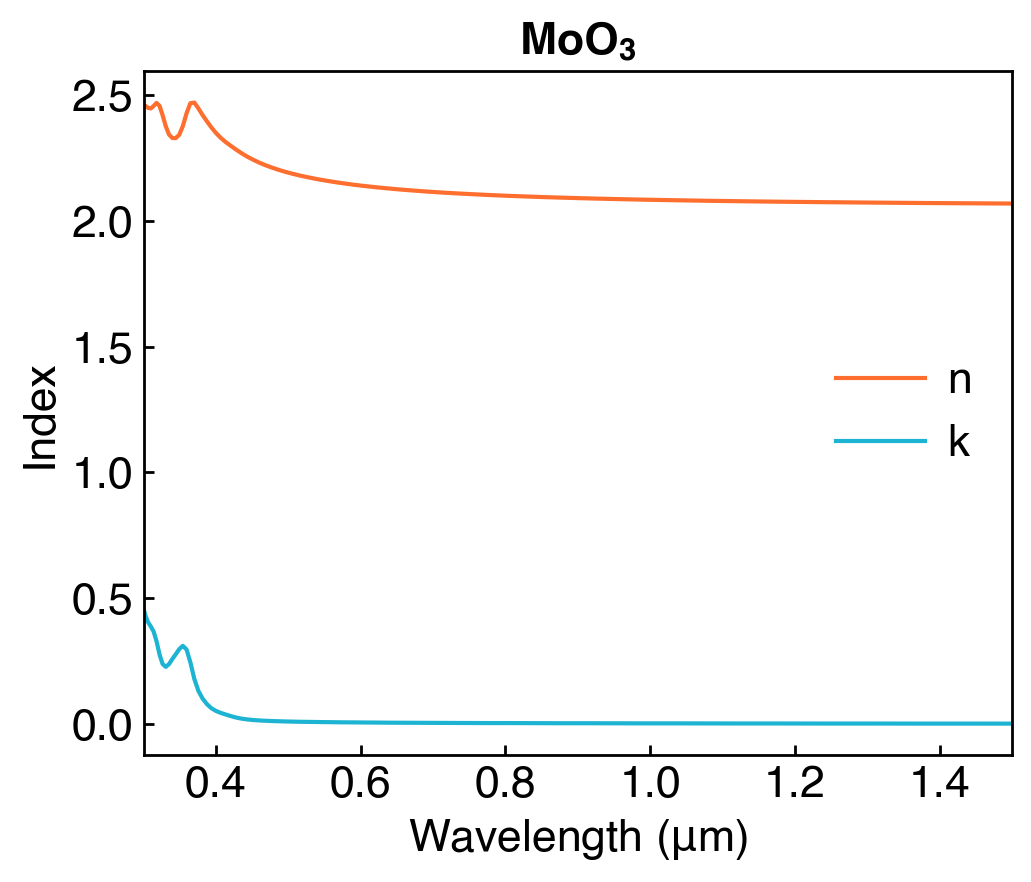

In [62]:
material='MoO_3'

fig,ax=plt.subplots()
lda=nkdata_raw[material+'_raw'][:,0]
n=nkdata_raw[material+'_raw'][:,1]
k=nkdata_raw[material+'_raw'][:,2]
plt.plot(lda,n,label='n')
plt.plot(lda,k,label='k')
ax.set_xlabel('Wavelength ($\mu$m)')
ax.set_ylabel('Index')
ax.set_xlim([0.3,1.5])
ax.set_title('$'+material+'$')
ax.legend()

save nk data

In [55]:
np.save('nkdata_raw.npy', nkdata_raw) 

note: only need PTAA, PTCDA now. do those, then start playing with TMM

### Old: converting from .mat to .npy

load nk data - as a dictionary with the different materials as items, arrays are lambda (microns), n, k

nkdata_raw = scipy.io.loadmat('nkdata.mat')
print(nkdata_raw.keys())

remove entries that aren't relevant

nkdata_raw.pop('__header__', None)
nkdata_raw.pop('__version__', None)
nkdata_raw.pop('__globals__', None)
print(nkdata_raw.keys())

save as numpy file

#Save
np.save('nkdata_raw.npy', nkdata_raw) 

#Load
test = np.load('nkdata_raw.npy',allow_pickle='TRUE').item()